# Modis_NDVI_daily_data_from_2000-2013

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [24]:
files = ['masked_data_modis(2000-2004).csv', 'masked_data_modis(2005-2008).csv','masked_data_modis(2009-2013).csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv('ndvi_masked_modis_daily_datas/'+file)
    df = pd.concat([df, data], axis=0)

# df.to_csv('precipitation_data/merged_files.csv', index=False)
# df.to_csv('precipitation_data/merged_files.csv', index=False)
df

,system:time_start,undefined
0,"Feb 24, 2000",NaN
1,"Feb 25, 2000",NaN
2,"Feb 26, 2000",0.323
3,"Feb 27, 2000",0.241
4,"Feb 28, 2000",0.237
...,...,...
1820,"Dec 26, 2013",0.136
1821,"Dec 27, 2013",0.273
1822,"Dec 28, 2013",0.176
1823,"Dec 29, 2013",0.123


In [25]:
df = df.rename(columns={'system:time_start':'dates','undefined':'ndvi'})
df

,dates,ndvi
0,"Feb 24, 2000",NaN
1,"Feb 25, 2000",NaN
2,"Feb 26, 2000",0.323
3,"Feb 27, 2000",0.241
4,"Feb 28, 2000",0.237
...,...,...
1820,"Dec 26, 2013",0.136
1821,"Dec 27, 2013",0.273
1822,"Dec 28, 2013",0.176
1823,"Dec 29, 2013",0.123


In [27]:
df =df.dropna()
df

,dates,ndvi
2,"Feb 26, 2000",0.323
3,"Feb 27, 2000",0.241
4,"Feb 28, 2000",0.237
5,"Feb 29, 2000",0.355
6,"Mar 1, 2000",0.265
...,...,...
1820,"Dec 26, 2013",0.136
1821,"Dec 27, 2013",0.273
1822,"Dec 28, 2013",0.176
1823,"Dec 29, 2013",0.123


In [28]:
df = df.reset_index(inplace=False)

In [29]:
df

,index,dates,ndvi
0,2,"Feb 26, 2000",0.323
1,3,"Feb 27, 2000",0.241
2,4,"Feb 28, 2000",0.237
3,5,"Feb 29, 2000",0.355
4,6,"Mar 1, 2000",0.265
...,...,...,...
4971,1820,"Dec 26, 2013",0.136
4972,1821,"Dec 27, 2013",0.273
4973,1822,"Dec 28, 2013",0.176
4974,1823,"Dec 29, 2013",0.123


In [99]:
df['dates'] = pd.to_datetime(df['dates'])
df_for_3year = df.head(1100)

In [100]:
x = df_for_3year.index
y = df_for_3year['ndvi']

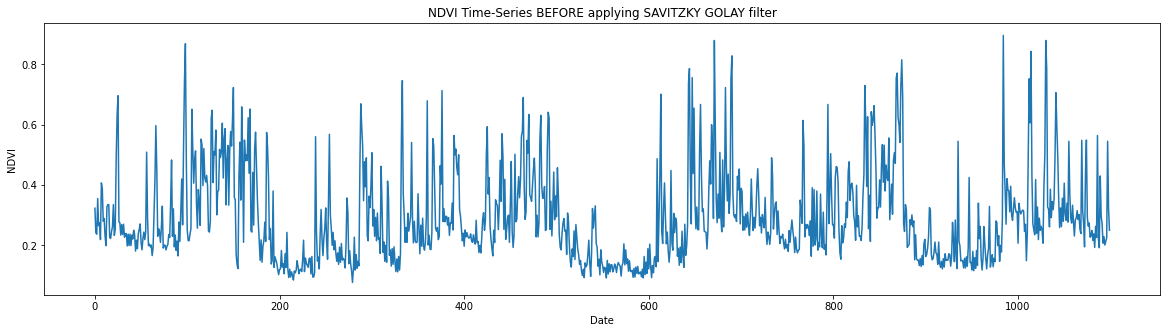

In [101]:
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.title("NDVI Time-Series BEFORE applying SAVITZKY GOLAY filter")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.plot(x,y)

In [40]:
from scipy.signal import savgol_filter

In [61]:
dummy = df['ndvi']
q = dummy.to_numpy()
q.shape


(4976,)

In [63]:
golay_values = savgol_filter(q,401,2)

In [96]:
# final_data = data.head(100)
final_data = pd.DataFrame(golay_values,columns=['ndvi'])
final_data
final_data_for_3_year = final_data.head(1100)

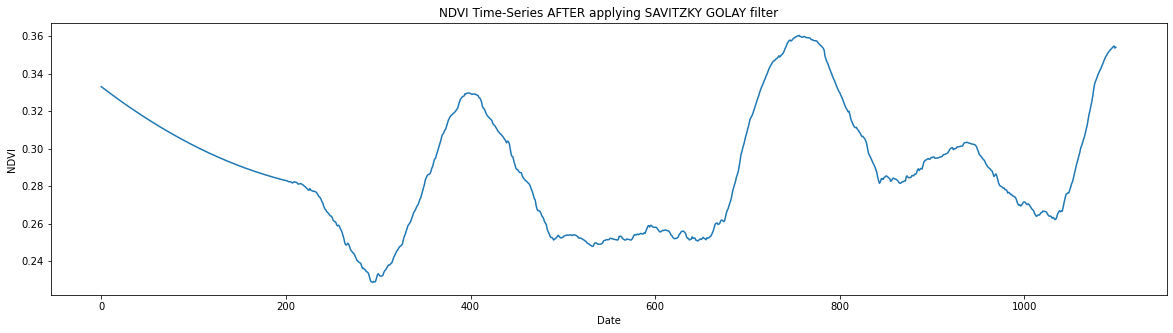

In [97]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.title("NDVI Time-Series AFTER applying SAVITZKY GOLAY filter")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.plot(final_data_for_3_year)
# plotting a line plot after changing it's width and height
